In [1]:
# auto reload
%load_ext autoreload
%autoreload 2

# import
import numpy as np
import matplotlib.pyplot as plt
import plotly
import cvxpy as cp

# load data
from main import P, X, x, visible_points, K


# Q1

### Q1.b - histogram of errors

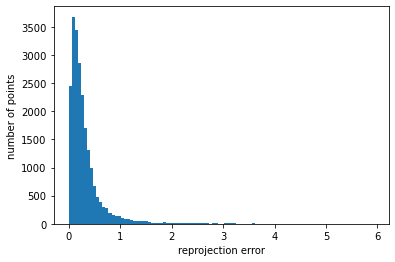

In [2]:
from utils import reprojection_errors

# change x to homogeneous coordinates
homogeneous_x = np.concatenate([x, np.ones((x.shape[0], 1, x.shape[2]))], axis=1)
# calc errors
errors = reprojection_errors(P, X, homogeneous_x, visible_points)
# displat hist of errors
plt.hist(errors[visible_points], bins=100)
plt.ylabel("number of points")
plt.xlabel("reprojection error")
plt.show()

### Q1.e - triangulate using DLT (normalizes vs. unnormalizes)

In [3]:
from utils import normalize_cam_points
from triangulation import DLT_triangulation

# triangulate using unnormalized cameras and points
unnorm_X_pred_dlt = DLT_triangulation(P, homogeneous_x, visible_points)
# triangulate using normalized cameras and points
norm_P, norm_x = normalize_cam_points(P, homogeneous_x, np.linalg.inv(K))
norm_X_pred_dlt = DLT_triangulation(norm_P, norm_x, visible_points)

# calculate the different reprojection errors
dlt_norm_error   = np.nanmean(reprojection_errors(P, norm_X_pred_dlt,   homogeneous_x, visible_points))
dlt_unnorm_error = np.nanmean(reprojection_errors(P, unnorm_X_pred_dlt, homogeneous_x, visible_points))
gt_error         = np.nanmean(reprojection_errors(P, X,                 homogeneous_x, visible_points))

# print the different reprojection errors
print("mean reprojection error after dlt triangulation using \t NORMALIZED \t cameras and points is: \t{error}".format(error=dlt_norm_error))
print("mean reprojection error after dlt triangulation using \t UNNORMALIZED \t cameras and points is: \t{error}".format(error=dlt_unnorm_error))
print("mean reprojection error for \t\t\t\t GT \t\t points is: \t\t\t{error}".format(error=gt_error))

mean reprojection error after dlt triangulation using 	 NORMALIZED 	 cameras and points is: 	0.3210541256757366
mean reprojection error after dlt triangulation using 	 UNNORMALIZED 	 cameras and points is: 	10.766182016053962
mean reprojection error for 				 GT 		 points is: 			0.320861680756133


# Q2

### Q2.e - triangulate using SOCP (normalizes vs. unnormalizes)

  0%|▏                                                                      | 16/5302 [00:04<30:36,  2.88it/s]C:\Users\user\anaconda3\envs\neural_networks\lib\site-packages\cvxpy\problems\problem.py:1278: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████| 5302/5302 [05:22<00:00, 16.46it/s]


mean reprojection error after socp triangulation using 	 NORMALIZED 	 cameras and points is: 	0.33994641002536263
mean reprojection error after socp triangulation using 	 UNNORMALIZED 	 cameras and points is: 	0.363095442905146


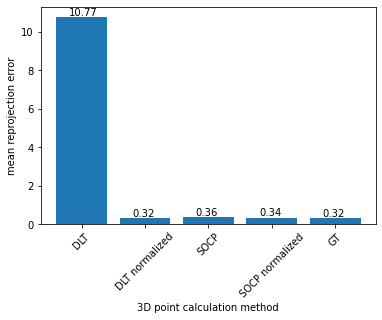

In [4]:
from triangulation import SOCP_triangulate_all_points
# set consts
max_iter=35
low=0
high=1024
tol=1e-4

# triangulate using unnormalized cameras and points
unnorm_X_pred_socp = SOCP_triangulate_all_points(homogeneous_x, P, visible_points, max_iter=max_iter, low=low, high=high, tol=tol)
# triangulate using normalized cameras and points
norm_X_pred_socp = SOCP_triangulate_all_points(norm_x, norm_P, visible_points, max_iter=max_iter, low=low, high=high, tol=tol)

# calculate the different reprojection errors
socp_norm_error   = np.nanmean(reprojection_errors(P, norm_X_pred_socp,   homogeneous_x, visible_points))
socp_unnorm_error = np.nanmean(reprojection_errors(P, unnorm_X_pred_socp, homogeneous_x, visible_points))

# print the different reprojection errors
print("mean reprojection error after socp triangulation using \t NORMALIZED \t cameras and points is: \t{error}".format(error=socp_norm_error))
print("mean reprojection error after socp triangulation using \t UNNORMALIZED \t cameras and points is: \t{error}".format(error=socp_unnorm_error))

# plot the bar chart
error_values = [dlt_unnorm_error, dlt_norm_error, socp_unnorm_error, socp_norm_error, gt_error]
plt.bar(["DLT", "DLT normalized", "SOCP", "SOCP normalized", "GT"], error_values)
for index, value in enumerate(error_values):
    plt.text(index - 0.2, value + 0.1, "{:.2f}".format(value))
plt.ylabel("mean reprojection error")
plt.xlabel("3D point calculation method")
plt.xticks(rotation=45)
plt.show()

### Q2.f - visualize reconstructions

In [5]:
from utils import plot_cameras
# visualize worst mean error
plot_cameras(P, K, unnorm_X_pred_dlt, title='3D_reconstruction_DLT_unnormalized')

# visualize best mean error
plot_cameras(P, K, X, title='3D_reconstruction_GT_points')